In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

Landsat 8 surface reflectance nwe algorithms

In [3]:
%cd /Users/ckuhn/Documents/ABOVE/Data/Landsat8/newL8
NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
FLHV_raw = pd.read_csv('FLH_Violet.csv', low_memory=False)
SABI_raw = pd.read_csv('SABI.csv', low_memory=False)
nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

/Users/ckuhn/Documents/ABOVE/Data/Landsat8/newL8


In [4]:
NDCI_raw.head(2)

,system:time_start,Lake_1-46-3,Abraham Lake,Greenpepper Lake,Sands of Time,Boot Lake,Canvasback Lake,YF04,Scoter Lake,YF03,...,West Crazy Lake,YF20,YF08,YF14,Thumb Lake,Twelvemile Lake,Twin Lake,Shack Lake,YF02,Buddy Lake
0,"Jun 3, 2016",NaN,NaN,NaN,NaN,NaN,NaN,-0.078,NaN,-0.284,...,NaN,-0.163,-0.101,NaN,NaN,-0.14,NaN,NaN,-0.355,-0.028
1,"Jun 8, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.132,NaN,NaN,NaN,0.102,NaN,NaN


In [5]:
df = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

In [6]:
df.head(1)

,system:time_start,Lake,Reflectance
0,"Jun 3, 2016",Lake_1-46-3,NaN


In [7]:
df.tail(2)

,system:time_start,Lake,Reflectance
790,"Oct 14, 2016",Buddy Lake,NaN
791,"Oct 14, 2016",Buddy Lake,NaN


### Resample the dataframe to every month

In [8]:
df2 = df.set_index(pd.DatetimeIndex(df['system:time_start']))
df2 = df2.resample("M").median()

df2 = df2.reset_index()
df2
# unset the index

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html

,system:time_start,Reflectance
0,2016-06-30,-0.099
1,2016-07-31,-0.109
2,2016-08-31,-0.031
3,2016-09-30,-0.236
4,2016-10-31,-0.305


In [9]:
#remelt that shit
df3 = pd.melt(df2, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

#### Change the shape of the dataframe for plotting

/Users/ckuhn/Documents/ABOVE/Figures


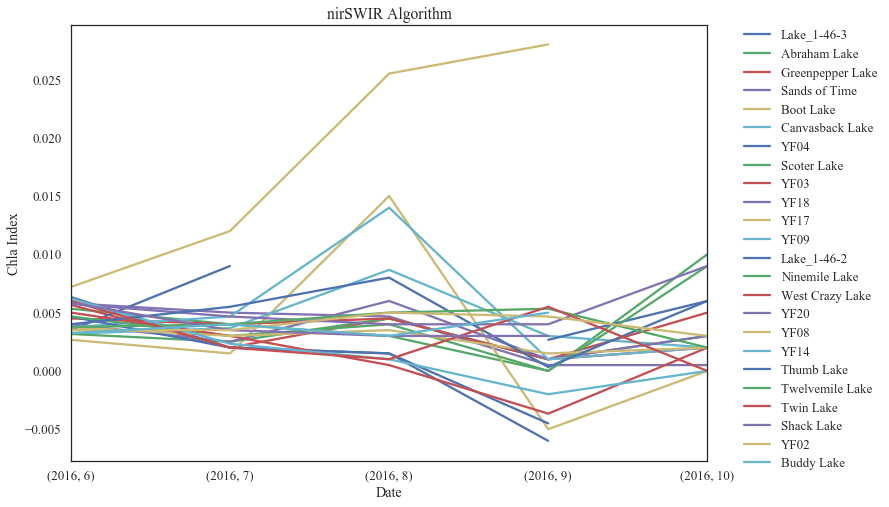

In [10]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

nirSWIR_df = nirSWIR_raw.set_index(pd.DatetimeIndex(nirSWIR_raw['system:time_start']))
nirSWIR  = nirSWIR_df.groupby([(nirSWIR_df.index.year),(nirSWIR_df.index.month)]).mean()
nirSWIR.plot() ## Can change to kind = 'bar' 
plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('nirSWIR Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_nirSWIR_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


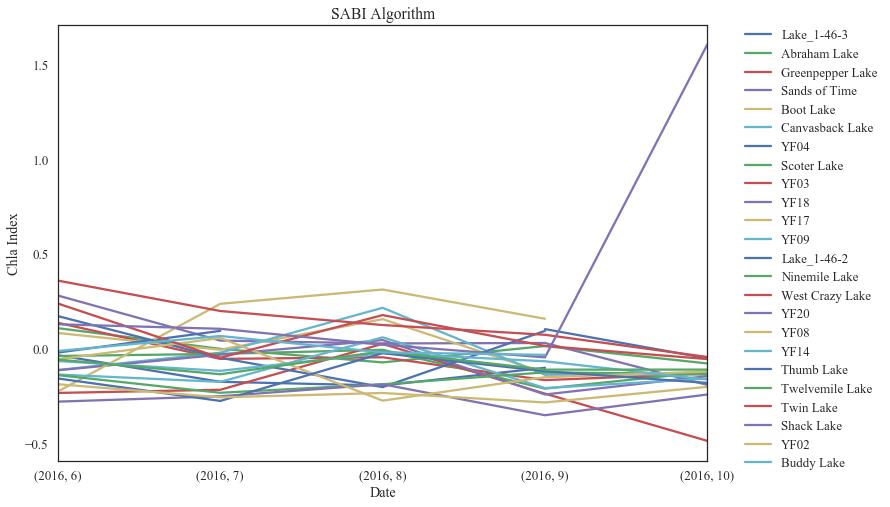

In [11]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

SABI_df = SABI_raw.set_index(pd.DatetimeIndex(SABI_raw['system:time_start']))
SABI  = SABI_df.groupby([(SABI_df.index.year),(SABI_df.index.month)]).mean()
SABI.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('SABI Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_SABI_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


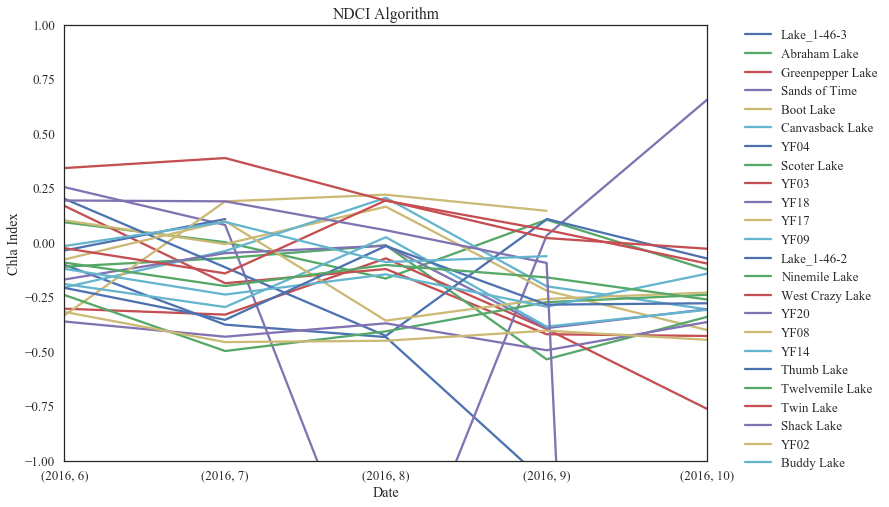

In [35]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

NDCI_df = NDCI_raw.set_index(pd.DatetimeIndex(NDCI_raw['system:time_start']))
NDCI  = NDCI_df.groupby([(NDCI_df.index.year),(NDCI_df.index.month)]).mean()
NDCI.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('NDCI Algorithm')
plt.ylim(-1, 1) # drop cray cray shack

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_NDCI_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


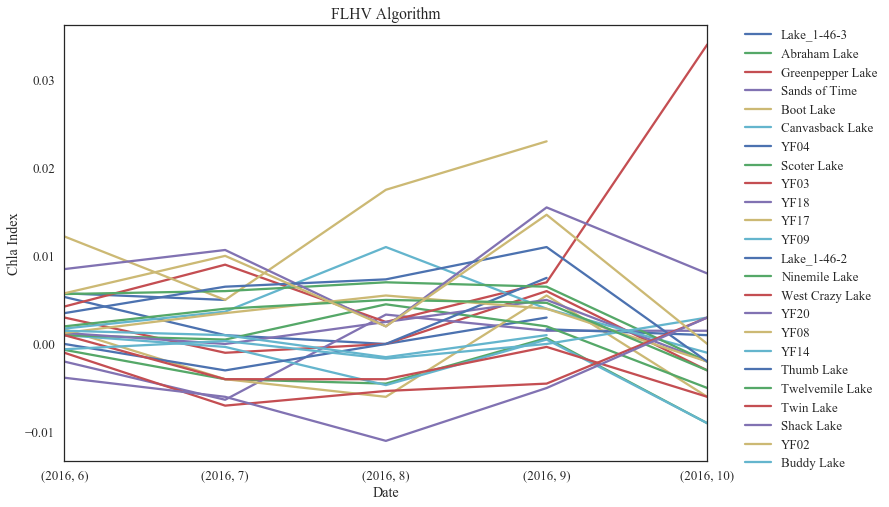

In [36]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

FLHV_df = FLHV_raw.set_index(pd.DatetimeIndex(FLHV_raw['system:time_start']))
FLHV  = FLHV_df.groupby([(FLHV_df.index.year),(FLHV_df.index.month)]).mean()
FLHV.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('FLHV Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_FLHV_bar.png', dpi = 300)

### Monthly Averages Per Algorithms

In [37]:
# Melt them all 
df1 = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df2 = pd.melt(FLHV_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df3 = pd.melt(nirSWIR_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df4 = pd.melt(SABI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

df4.head(1)

,system:time_start,Lake,Reflectance
0,"Jun 3, 2016",Lake_1-46-3,NaN


In [38]:
# Add column with categorical
df1['Algorithm'] = 'NDCI'
df2['Algorithm'] = 'FLHV'
df3['Algorithm'] = 'nirSWIR'
df4['Algorithm'] = 'SABI'

In [39]:
df3.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 3, 2016",Lake_1-46-3,NaN,nirSWIR


In [40]:
df1['Reflectance'].min()

-15.372999999999999

In [41]:
# Concatenate
boss = df1.append(df2).append(df3).append(df4)

In [42]:
print(boss.shape)
boss.head(1)

(3168, 4)


,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 3, 2016",Lake_1-46-3,NaN,NDCI


In [43]:
# Now resample to the month

boss0 = boss.set_index(pd.DatetimeIndex(boss['system:time_start']))
boss1 = boss0.resample("M").median()

boss2 = boss1.reset_index()
boss.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 3, 2016",Lake_1-46-3,NaN,NDCI


In [44]:
#boss.groupby(['system:time_start', 'Algorithm']).mean()#.plot(kind = 'bar')
bossx = boss0.dropna()
grouper = bossx.groupby([pd.TimeGrouper('1M'), 'Algorithm'])
grouper['Algorithm'].count()

system:time_start  Algorithm
2016-06-30         FLHV         99
                   NDCI         99
                   SABI         99
                   nirSWIR      99
2016-07-31         FLHV         44
                   NDCI         44
                   SABI         44
                   nirSWIR      44
2016-08-31         FLHV         47
                   NDCI         47
                   SABI         47
                   nirSWIR      47
2016-09-30         FLHV         50
                   NDCI         50
                   SABI         50
                   nirSWIR      50
2016-10-31         FLHV         23
                   NDCI         23
                   SABI         23
                   nirSWIR      22
Name: Algorithm, dtype: int64

In [45]:
result = grouper['Reflectance'].mean().unstack('Algorithm')
result
#https://stackoverflow.com/questions/32012012/pandas-resample-timeseries-with-groupby

Algorithm,FLHV,NDCI,SABI,nirSWIR
system:time_start,,,,
2016-06-30,0.002293,-0.078596,-0.023505,0.004657
2016-07-31,0.001727,-0.115250,-0.054750,0.004182
2016-08-31,0.001468,-0.190468,-0.000021,0.005319
2016-09-30,0.004680,-0.188380,-0.087000,0.001640
2016-10-31,0.000087,-0.865087,-0.075609,0.003273


In [46]:
stderr = grouper['Reflectance'].std().unstack('Algorithm')
stderr

Algorithm,FLHV,NDCI,SABI,nirSWIR
system:time_start,,,,
2016-06-30,0.004594,0.233520,0.186755,0.002872
2016-07-31,0.005943,0.240663,0.153572,0.002687
2016-08-31,0.007265,0.879171,0.193504,0.005964
2016-09-30,0.006349,0.291358,0.163219,0.005536
2016-10-31,0.008644,3.186885,0.379322,0.003027


In [47]:
stderr = grouper['Reflectance'].min().unstack('Algorithm')
stderr

Algorithm,FLHV,NDCI,SABI,nirSWIR
system:time_start,,,,
2016-06-30,-0.014,-0.779,-0.351,-0.000
2016-07-31,-0.010,-0.576,-0.367,0.001
2016-08-31,-0.012,-5.832,-0.405,-0.001
2016-09-30,-0.005,-1.102,-0.406,-0.010
2016-10-31,-0.009,-15.373,-0.485,-0.001


/Users/ckuhn/Documents/ABOVE/Figures


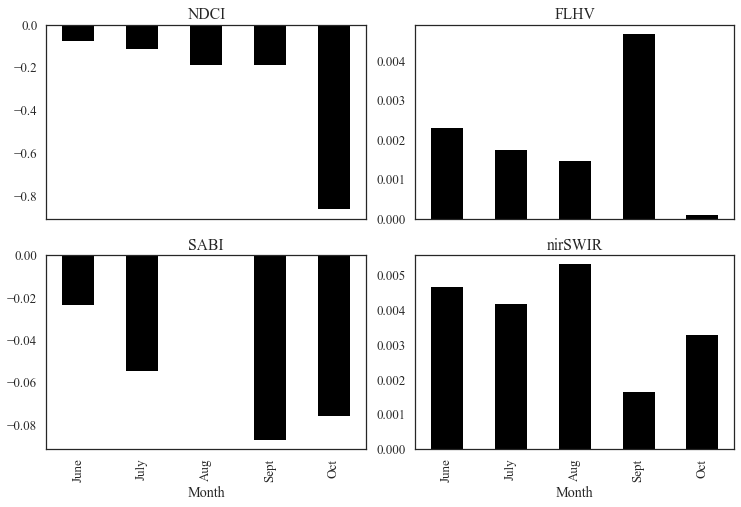

In [70]:
fig, ax = plt.subplots(2, 2)

result['NDCI'].plot(kind= 'bar', color ='black', ax=ax[0,0]) #no need to specify for first axis
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('NDCI')
ax[0, 0].set_xticklabels([])

result['FLHV'].plot(kind= 'bar', color ='black', ax=ax[0, 1]) #no need to specify for first axis
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('FLHV')
ax[0, 1].set_xticklabels([])


result['SABI'].plot(kind= 'bar', color ='black', ax=ax[1, 0]) #no need to specify for first axis
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_title('SABI')
labels = ['June','July', 'Aug', 'Sept', 'Oct']
ax[1, 0].set_xticklabels(labels)

result['nirSWIR'].plot(kind= 'bar', color ='black', ax=ax[1, 1]) #no need to specify for first axis
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_title('nirSWIR')
ax[1, 1].set_xticklabels(labels)

plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_newAlg_bar_L8.png', dpi = 300)

In [49]:
df2.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 3, 2016",Lake_1-46-3,NaN,FLHV


/Users/ckuhn/Documents/ABOVE/Figures


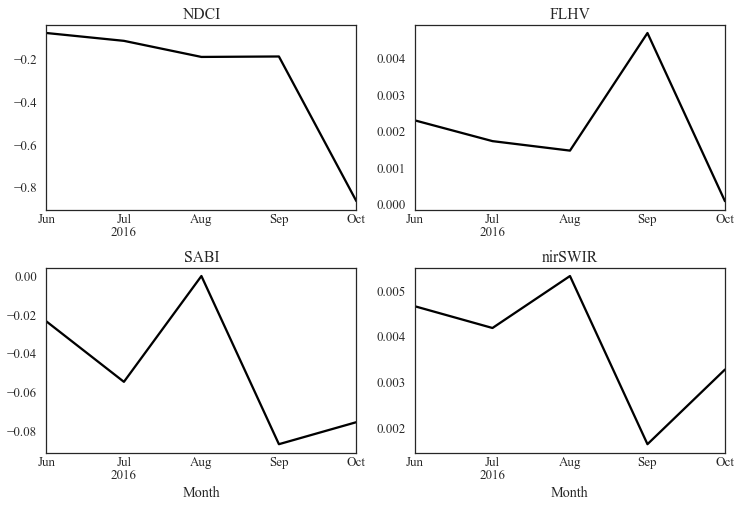

In [50]:
fig, ax = plt.subplots(2, 2)

result['NDCI'].plot(color ='black', ax=ax[0,0]) #no need to specify for first axis
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('NDCI')
ax[0, 0].set_xticklabels([])

result['FLHV'].plot(color ='black', ax=ax[0, 1]) #no need to specify for first axis
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('FLHV')
ax[0, 1].set_xticklabels([])


result['SABI'].plot(color ='black', ax=ax[1, 0]) #no need to specify for first axis
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_title('SABI')
labels = ['June','July', 'Aug', 'Sept']
ax[1, 0].set_xticklabels(labels)

result['nirSWIR'].plot(color ='black', ax=ax[1, 1]) #no need to specify for first axis
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_title('nirSWIR')
ax[1, 1].set_xticklabels(labels)

plt.tight_layout()


%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_newAlg_line_L8.png', dpi = 300)

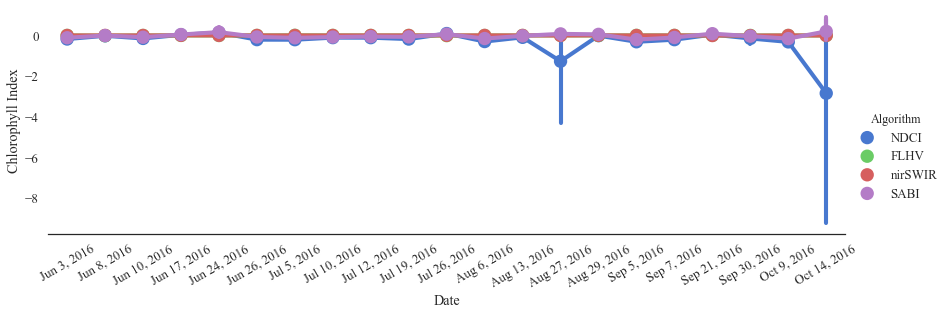

In [52]:
g = sns.factorplot(x="system:time_start", y="Reflectance", hue="Algorithm", data=boss,
                   palette="muted", size=4, aspect=3)

g.despine(left=True)
g.set_ylabels("Chlorophyll Index")
g.set_xlabels("Date")
g.set_xticklabels(rotation=30)

#plt.tight_layout()

/Users/ckuhn/Documents/ABOVE/Figures


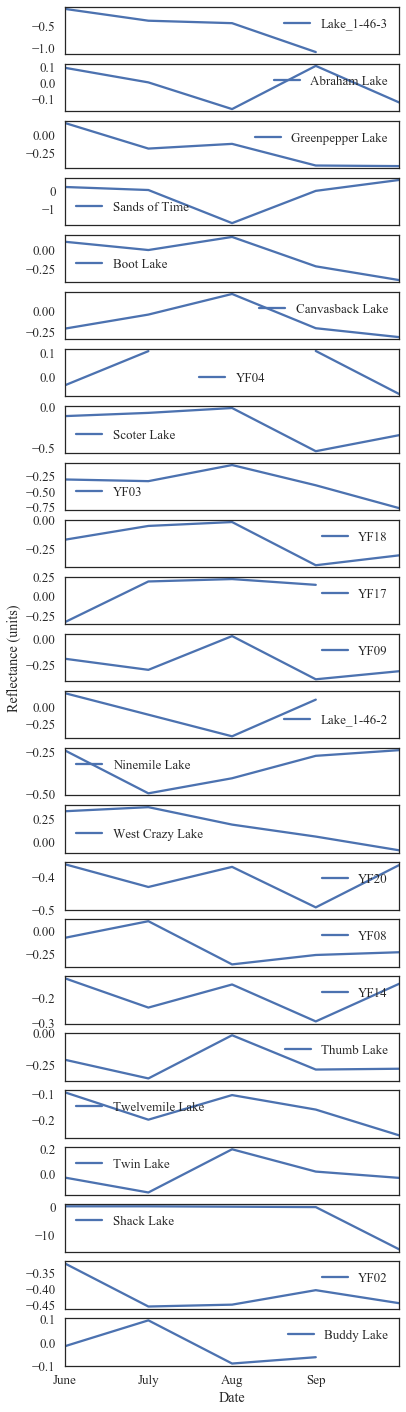

In [72]:
data = NDCI

#NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
#rgb_raw = pd.read_csv('rgb.csv', low_memory=False)
#blueGreen_raw = pd.read_csv('blueGreen.csv', low_memory=False)
#nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

fig, ax = plt.subplots(len(data.columns))
for idx in range(len(data.columns)):
    data[data.columns[idx]].plot(ax=ax[idx])

ax[idx//2].set_ylabel("Reflectance (units)")

# Retrieve an element of a plot and set properties
for idx in range(len(data.columns)):
    ax[idx].set_xticklabels('')
    ax[idx].legend()
    
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")

ax[idx].set_xticklabels(['June','', 'July','', 'Aug','', 'Sep'])

fig.set_size_inches([6, 25])

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('indv_TS_NDCI.png', dpi = 300)

### Chla Index By Lake for Matt

/Users/ckuhn/Documents/ABOVE/Figures


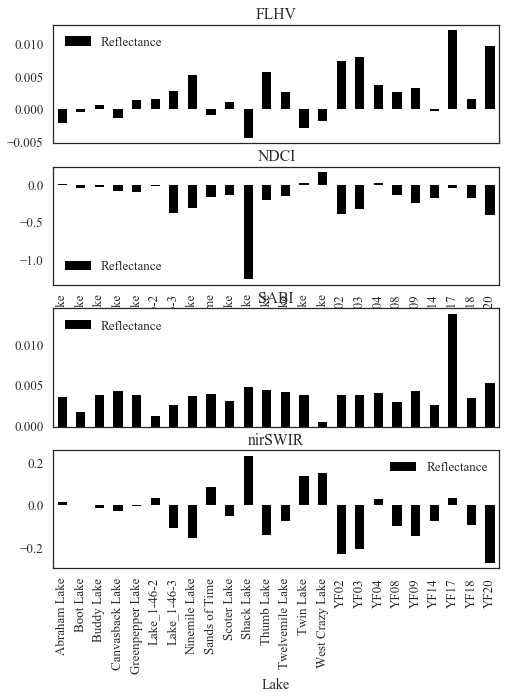

In [55]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

fig, ax = plt.subplots(4)

df2.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_title('FLHV')
ax[0].set_xticklabels([])

df1.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[1])
#ax[1].set_xlabel('')
ax[1].set_title('NDCI')
#ax[1].set_xticklabels([])

df3.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_title('SABI')
ax[2].set_xticklabels([])

df4.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[3])
#ax[1].set_xlabel('')
ax[3].set_title('nirSWIR')
#ax[1].set_xticklabels([])


fig.set_size_inches([8, 10])


#plt.tight_layout()
%cd /Users/ckuhn/Documents/ABOVE/figures
#plt.savefig('RGB_NCDI_L8_bar.png', dpi = 300)

In [31]:
g1 = df1.groupby(['Lake']).mean()
g2 = df2.groupby(['Lake']).mean()

g1 = g1.reset_index()
g2 = g2.reset_index()

g2['FLHV Chla Index'] = g2['Reflectance']
g1['NDCI Chla Index'] = g1['Reflectance']

concat = pd.concat([g1,g2])
#concat = concat.drop('Reflectance')
print(concat)

# concat.to_csv('alg_results_for_matt.csv')

    FLHV Chla Index              Lake  NDCI Chla Index  Reflectance
0               NaN      Abraham Lake         0.014400     0.014400
1               NaN         Boot Lake        -0.042444    -0.042444
2               NaN        Buddy Lake        -0.033100    -0.033100
3               NaN   Canvasback Lake        -0.087786    -0.087786
4               NaN  Greenpepper Lake        -0.096250    -0.096250
5               NaN       Lake_1-46-2        -0.019125    -0.019125
6               NaN       Lake_1-46-3        -0.378429    -0.378429
7               NaN     Ninemile Lake        -0.312889    -0.312889
8               NaN     Sands of Time        -0.168400    -0.168400
9               NaN       Scoter Lake        -0.141833    -0.141833
10              NaN        Shack Lake        -1.260909    -1.260909
11              NaN        Thumb Lake        -0.208533    -0.208533
12              NaN   Twelvemile Lake        -0.143923    -0.143923
13              NaN         Twin Lake         0.

In [32]:
df1

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 3, 2016",Lake_1-46-3,NaN,NDCI
1,"Jun 8, 2016",Lake_1-46-3,NaN,NDCI
2,"Jun 10, 2016",Lake_1-46-3,NaN,NDCI
3,"Jun 10, 2016",Lake_1-46-3,-0.448,NDCI
4,"Jun 17, 2016",Lake_1-46-3,0.066,NDCI
5,"Jun 17, 2016",Lake_1-46-3,0.077,NDCI
6,"Jun 24, 2016",Lake_1-46-3,NaN,NDCI
7,"Jun 24, 2016",Lake_1-46-3,NaN,NDCI
8,"Jun 26, 2016",Lake_1-46-3,NaN,NDCI
9,"Jun 26, 2016",Lake_1-46-3,NaN,NDCI


In [97]:
# Not sure why this is giving me no values back?

choiceDF = df4

# options: df1: NCDI, df2: FLHV, df3: SABI, df4:nirSWIR

juneMatchups1 = choiceDF.loc[choiceDF['system:time_start'] == 'Jun 24, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']
juneMatchups2 = choiceDF.loc[choiceDF['system:time_start'] == 'Jun 26, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']
juneMatchups3 = choiceDF.loc[choiceDF['system:time_start'] == 'Jul 5, 2016'] #| df1.loc[df1['system:time_start'] == '23-Sep-16']


## Sep 7 and June 29th has the best clear images
sepMatchups1 = choiceDF.loc[choiceDF['system:time_start'] == 'Sep 7, 2016']
sepMatchups2 = choiceDF.loc[choiceDF['system:time_start'] == 'Sep 21, 2016']

exactMatchups = juneMatchups1.append(juneMatchups2).append(juneMatchups3).append(sepMatchups1).append(sepMatchups2)

/Users/ckuhn/Documents/ABOVE/Figures


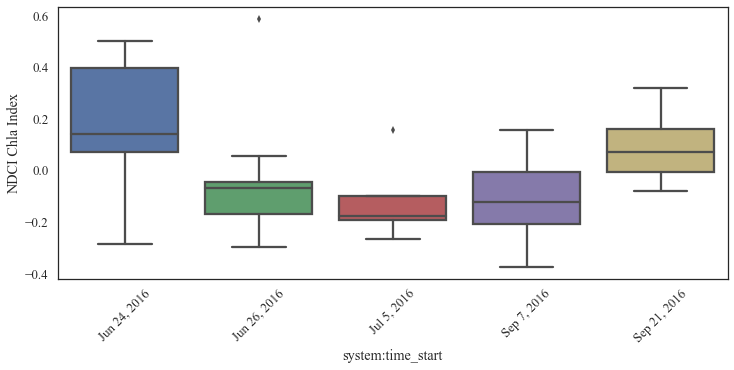

In [98]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(exactMatchups['system:time_start'], exactMatchups['Reflectance'],ax=ax)
ax.set_ylabel('NDCI Chla Index')
#plt.ylim(0,0.01)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
%cd /Users/ckuhn/Documents/ABOVE/figures
#plt.savefig('NDCI_L8SR_box.png', dpi = 300)

(-0.01, 0.03)

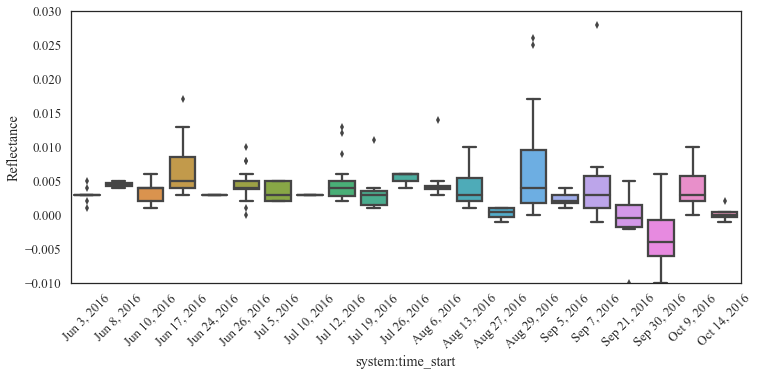

In [99]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df3['system:time_start'], df3['Reflectance'],ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
plt.ylim(-0.01,0.03)